In [2]:
import mnist
import matplotlib.pyplot as plt
from kmeans.basic import kmeans
from kmeans.kmeanspp import kmeanspp
import numpy as np
from sklearn.decomposition import PCA
import pandas
from stars import load_stars, get_accuracy
from collections import Counter

# Star dataset:

100 runs, beginning with kmeans() (which uses Forgy inititalisation as default), to plot accuracy vs loss and print some stats mentioned in the report.

Kmeans++ and MNIST are used below. To use MNIST you must download it from here: https://www.kaggle.com/oddrationale/mnist-in-csv and place it in the data/ folder

To change the distance function used (Euclidean is default), you must change the code as discussed in the README of the repository.

The first figure below visualizes the star dataset, as seen in Figure 2 of the report

The second figure is similar to Figure 4 

The histograms are similar to Figure 6

Avg number of iterations used is printed, as seen from Table 3.

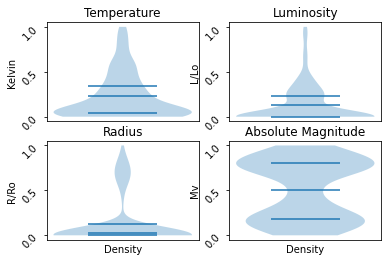

In [3]:
star_data = load_stars() # load data
np.set_printoptions(suppress=True)


fig, axs = plt.subplots(2, 2)
test = axs[0, 0].violinplot(dataset=np.transpose(star_data)[0], showextrema=False, showmeans=True, quantiles=[0.25, 0.75])
axs[0, 0].set_title('Temperature')
axs[0, 1].violinplot(dataset=np.transpose(star_data)[1], showextrema=False, showmeans=True, quantiles=[0.25, 0.75])
axs[0, 1].set_title('Luminosity')
axs[1, 0].violinplot(dataset=np.transpose(star_data)[2], showextrema=False, showmeans=True, quantiles=[0.25, 0.75])
axs[1, 0].set_title('Radius')
axs[1, 1].violinplot(dataset=np.transpose(star_data)[3], showextrema=False, showmeans=True, quantiles=[0.25, 0.75])
axs[1, 1].set_title('Absolute Magnitude')

for i, ax in enumerate(axs.flat):
    ax.tick_params(labelrotation=45)
    ax.set_xticks([])
    ax.set(ylabel=['Kelvin', 'L/Lo', 'R/Ro', 'Mv'][i])
    if i > 1:
        ax.set(xlabel="Density")

plt.show()

The comments below are relevant to almost every upcoming cell, so we suggest reading all comments if you are interested

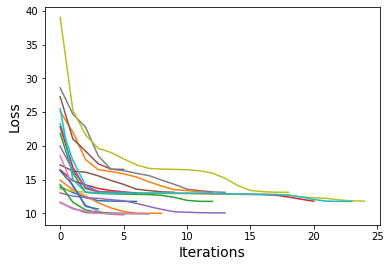

Max loss: 16.5212782 , Min loss: 9.7646052 , Avg loss 11.5205052 , Std: 1.3510532
Max accuracy: 0.7791672 , Min accuracy: 0.4333332 , Avg accuracy 0.6492502 , Std: 0.0792732
Max largest cluster size: 129 , Min largest cluster size: 55 , Avg largest cluster size 87.2400002 , Std: 17.3914462
Max number of iterations: 36 , Min number of iterations: 4 , Avg number of iterations 12.0400002 , Std: 6.8817442


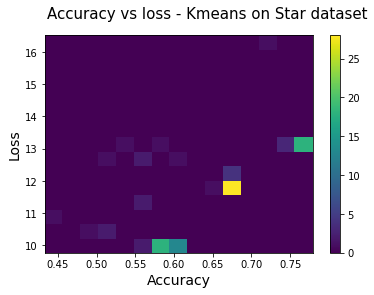

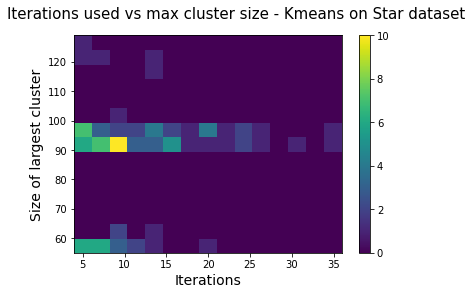

In [4]:
acc = [] # the accuracy from each run in the loop below
loss = [] # the loss from each run
iters = [] # the number of iterations used for each run
sizes = [] # the size of the largest cluster for each run below
for i in range(100):
    # kmeans() (and kmeanspp()) parameters: data, num_clusters, number of runs for best of n runs enhancement
    c, a, l = kmeans(star_data, 6, 1); # c, a, l, :centroids, assignments and loss from each iteration
    loss.append(l[-1]) # append final loss
    acc.append(get_accuracy(a)[-1]) #get accuracy based on assignments and ground truth
    iters.append(len(l)) # append number of iterations
    sizes.append(sum(Counter(a).most_common(1)[0])) #find and append size of largest cluster
    if i < 20:
        plt.plot(l)
plt.xlabel('Iterations', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.show()


print("Max loss: %f2 , Min loss: %f2 , Avg loss %f2 , Std: %f2" % (np.max(loss), np.min(loss), np.mean(loss), np.std(loss)))
print("Max accuracy: %f2 , Min accuracy: %f2 , Avg accuracy %f2 , Std: %f2" % (np.max(acc), np.min(acc), np.mean(acc), np.std(acc)))
print("Max largest cluster size: %d , Min largest cluster size: %d , Avg largest cluster size %f2 , Std: %f2" % (np.max(sizes), np.min(sizes), np.mean(sizes), np.std(sizes)))
print("Max number of iterations: %d , Min number of iterations: %d , Avg number of iterations %f2 , Std: %f2" % (np.max(iters), np.min(iters), np.mean(iters), np.std(iters)))
plt.hist2d(x=acc, y=loss, bins=15)
plt.suptitle('Accuracy vs loss - Kmeans on Star dataset', fontsize=15)
plt.xlabel('Accuracy', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.colorbar()
plt.show()

plt.hist2d(x=iters, y=sizes, bins=15)
plt.suptitle('Iterations used vs max cluster size - Kmeans on Star dataset', fontsize=15)
plt.xlabel('Iterations', fontsize=14)
plt.ylabel('Size of largest cluster', fontsize=14)
plt.colorbar()
plt.show()


## Now with K-means++
Again with 100 runs, relevant to Figure 4, Figure 6, and Table 3.

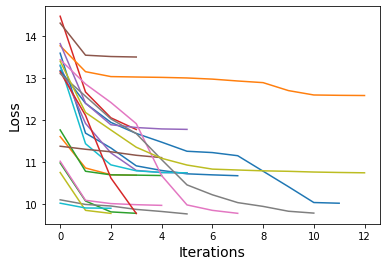

Max loss: 13.5087292 , Min loss: 9.7646052 , Avg loss 10.7170282 , Std: 0.9531062
Max accuracy: 0.6791672 , Min accuracy: 0.4166672 , Avg accuracy 0.5412082 , Std: 0.0780762
Max largest cluster size: 133 , Min largest cluster size: 91 , Avg largest cluster size 105.8700002 , Std: 16.1137552
Max number of iterations: 22 , Min number of iterations: 2 , Avg number of iterations 7.8000002 , Std: 4.3243502


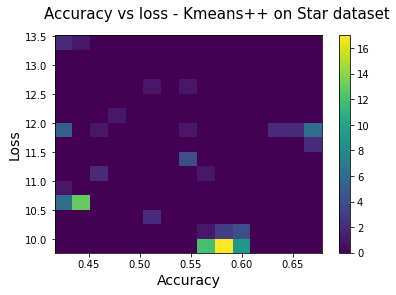

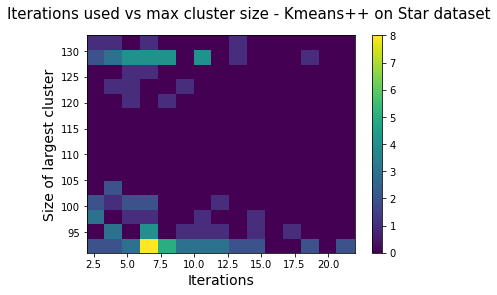

In [13]:
acc = []
loss = []
iters = []
sizes = []
for i in range(100):
    c, a, l = kmeanspp(star_data, 6, 1); # centroids, assignments and loss from each iteration
    loss.append(l[-1])
    acc.append(get_accuracy(a)[-1])
    iters.append(len(l))
    sizes.append(sum(Counter(a).most_common(1)[0]))
    if i < 20:
        plt.plot(l)
plt.xlabel('Iterations', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.show()

print("Max loss: %f2 , Min loss: %f2 , Avg loss %f2 , Std: %f2" % (np.max(loss), np.min(loss), np.mean(loss), np.std(loss)))
print("Max accuracy: %f2 , Min accuracy: %f2 , Avg accuracy %f2 , Std: %f2" % (np.max(acc), np.min(acc), np.mean(acc), np.std(acc)))
print("Max largest cluster size: %d , Min largest cluster size: %d , Avg largest cluster size %f2 , Std: %f2" % (np.max(sizes), np.min(sizes), np.mean(sizes), np.std(sizes)))
print("Max number of iterations: %d , Min number of iterations: %d , Avg number of iterations %f2 , Std: %f2" % (np.max(iters), np.min(iters), np.mean(iters), np.std(iters)))
plt.hist2d(x=acc, y=loss, bins=15)
plt.suptitle('Accuracy vs loss - Kmeans++ on Star dataset', fontsize=15)
plt.xlabel('Accuracy', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.colorbar()
plt.show()

plt.hist2d(x=iters, y=sizes, bins=15)
plt.suptitle('Iterations used vs max cluster size - Kmeans++ on Star dataset', fontsize=15)
plt.xlabel('Iterations', fontsize=14)
plt.ylabel('Size of largest cluster', fontsize=14)
plt.colorbar()
plt.show()

# Star dataset using PCA with 1 to 4 components

You can change between kmeans and kmeans++ as you like---see code comment.

Scikit documentation for PCA: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

Max loss: 2.0657172 , Min loss: 1.2050992 , Avg loss 1.3705432 , Std: 0.2834132
Max accuracy: 0.6625002 , Min accuracy: 0.4958332 , Avg accuracy 0.6352502 , Std: 0.0293242
Max largest cluster size: 98 , Min largest cluster size: 63 , Avg largest cluster size 72.4500002 , Std: 6.8809522
Max number of iterations: 42 , Min number of iterations: 3 , Avg number of iterations 20.8700002 , Std: 12.0471202


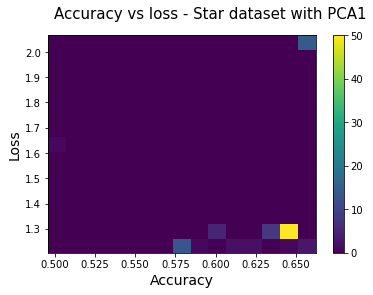

Max loss: 8.9880912 , Min loss: 4.2068002 , Avg loss 5.7920342 , Std: 1.1227892
Max accuracy: 0.7583332 , Min accuracy: 0.3750002 , Avg accuracy 0.6526672 , Std: 0.0849362
Max largest cluster size: 132 , Min largest cluster size: 50 , Avg largest cluster size 73.1500002 , Std: 19.7526582
Max number of iterations: 29 , Min number of iterations: 3 , Avg number of iterations 12.2400002 , Std: 5.9213512


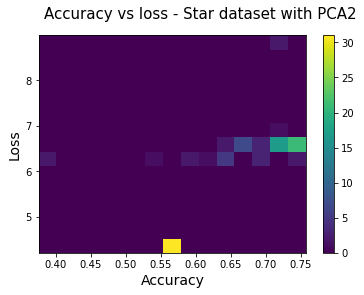

Max loss: 9.0551962 , Min loss: 5.9284102 , Avg loss 7.7275612 , Std: 1.0364212
Max accuracy: 0.6750002 , Min accuracy: 0.5000002 , Avg accuracy 0.6286672 , Std: 0.0482702
Max largest cluster size: 125 , Min largest cluster size: 81 , Avg largest cluster size 95.8500002 , Std: 5.8913072
Max number of iterations: 43 , Min number of iterations: 3 , Avg number of iterations 17.2900002 , Std: 10.1294572


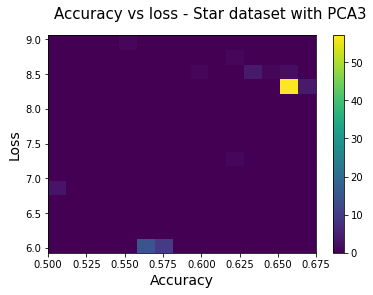

Max loss: 16.5212782 , Min loss: 9.7646052 , Avg loss 11.6492272 , Std: 1.2966412
Max accuracy: 0.7833332 , Min accuracy: 0.3750002 , Avg accuracy 0.6454172 , Std: 0.0933582
Max largest cluster size: 136 , Min largest cluster size: 53 , Avg largest cluster size 88.7300002 , Std: 20.1721862
Max number of iterations: 40 , Min number of iterations: 4 , Avg number of iterations 13.4700002 , Std: 8.6653972


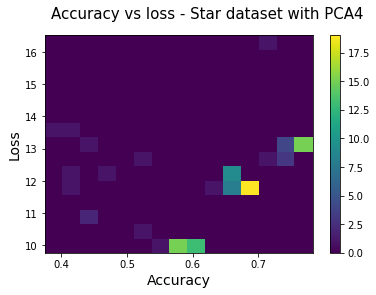

In [7]:
for i in range(1,5):    
    pca = PCA(n_components=i)
    d = pca.fit_transform(star_data)
    acc = []
    loss = []
    iters = []
    sizes = []
    for j in range(100):
        c, a, l = kmeans(d, 6, 1); # you can change to kmeans++ here by replacing kmeans with kmeanspp
        loss.append(l[-1])
        acc.append(get_accuracy(a)[-1])
        iters.append(len(l))
        sizes.append(sum(Counter(a).most_common(1)[0]))
    print("Max loss: %f2 , Min loss: %f2 , Avg loss %f2 , Std: %f2" % (np.max(loss), np.min(loss), np.mean(loss), np.std(loss)))
    print("Max accuracy: %f2 , Min accuracy: %f2 , Avg accuracy %f2 , Std: %f2" % (np.max(acc), np.min(acc), np.mean(acc), np.std(acc)))
    print("Max largest cluster size: %d , Min largest cluster size: %d , Avg largest cluster size %f2 , Std: %f2" % (np.max(sizes), np.min(sizes), np.mean(sizes), np.std(sizes)))
    print("Max number of iterations: %d , Min number of iterations: %d , Avg number of iterations %f2 , Std: %f2" % (np.max(iters), np.min(iters), np.mean(iters), np.std(iters)))
    plt.hist2d(x=acc, y=loss, bins=15)
    plt.suptitle('Accuracy vs loss - Star dataset with PCA' + str(i), fontsize=15)
    plt.xlabel('Accuracy', fontsize=14)
    plt.ylabel('Loss', fontsize=14)
    plt.colorbar()
    plt.show()

# MNIST with kmeans

This takes a lot more time to run! Beginning with kmeans():

The scatter plot is similar to Figure 5 of the report.

The histogram follows figure 7 in the report.

Some of the printed data is similar to Table 3

In [8]:
m = mnist.mnist()
mnist_data = m.get_test_set() # get data

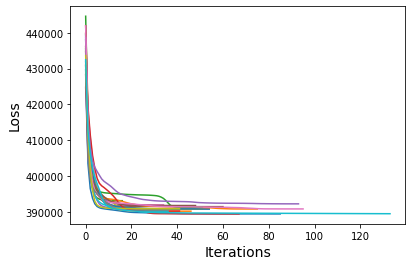

Max loss: 393135.8821592 , Min loss: 389444.2483022 , Avg loss 390882.0037462 , Std: 920.1662472
Max accuracy: 0.6369002 , Min accuracy: 0.5005002 , Avg accuracy 0.5642052 , Std: 0.0373712
Max largest cluster size: 1768 , Min largest cluster size: 1250 , Avg largest cluster size 1552.2000002 , Std: 134.3702352
Max number of iterations: 134 , Min number of iterations: 17 , Avg number of iterations 58.3000002 , Std: 26.8050372


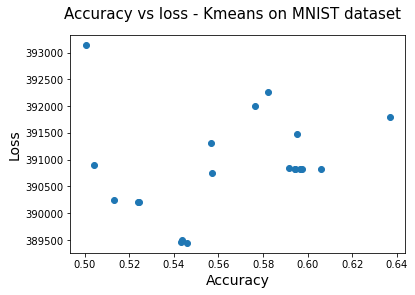

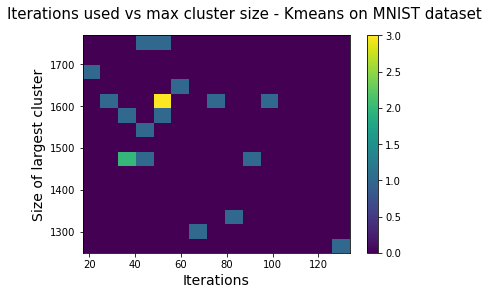

In [14]:
acc = []
loss = []
iters = []
sizes = []
for i in range(20):
    c, a, l = kmeans(mnist_data, 10, 1); # centroids, assignments and loss from each iteration
    loss.append(l[-1])
    acc.append(m.get_accuracy(a)[-1])
    iters.append(len(l))
    sizes.append(sum(Counter(a).most_common(1)[0]))
    plt.plot(l)
plt.xlabel('Iterations', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.show()


print("Max loss: %f2 , Min loss: %f2 , Avg loss %f2 , Std: %f2" % (np.max(loss), np.min(loss), np.mean(loss), np.std(loss)))
print("Max accuracy: %f2 , Min accuracy: %f2 , Avg accuracy %f2 , Std: %f2" % (np.max(acc), np.min(acc), np.mean(acc), np.std(acc)))
print("Max largest cluster size: %d , Min largest cluster size: %d , Avg largest cluster size %f2 , Std: %f2" % (np.max(sizes), np.min(sizes), np.mean(sizes), np.std(sizes)))
print("Max number of iterations: %d , Min number of iterations: %d , Avg number of iterations %f2 , Std: %f2" % (np.max(iters), np.min(iters), np.mean(iters), np.std(iters)))
plt.scatter(x=acc, y=loss)
plt.suptitle('Accuracy vs loss - Kmeans on MNIST dataset', fontsize=15)
plt.xlabel('Accuracy', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.show()

plt.hist2d(x=iters, y=sizes, bins=15)
plt.suptitle('Iterations used vs max cluster size - Kmeans on MNIST dataset', fontsize=15)
plt.xlabel('Iterations', fontsize=14)
plt.ylabel('Size of largest cluster', fontsize=14)
plt.colorbar()
plt.show()

# MNIST, now with kmeans++
Remember, you can change the distance function in the code as discussed in the README.

Relevant to Figure 5, Figure 7 and Table 3 of the report

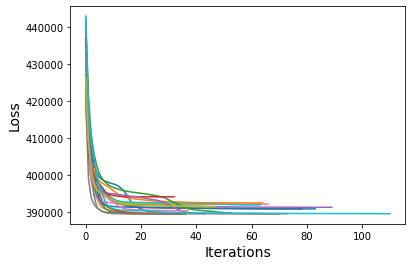

Max loss: 394059.6228052 , Min loss: 389444.7145282 , Avg loss 390712.8453222 , Std: 1315.6623192
Max accuracy: 0.6206002 , Min accuracy: 0.4530002 , Avg accuracy 0.5528952 , Std: 0.0406822
Max largest cluster size: 1645 , Min largest cluster size: 1239 , Avg largest cluster size 1456.4000002 , Std: 143.6987822
Max number of iterations: 111 , Min number of iterations: 28 , Avg number of iterations 57.5000002 , Std: 22.7123312


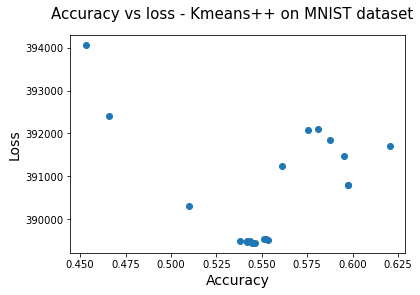

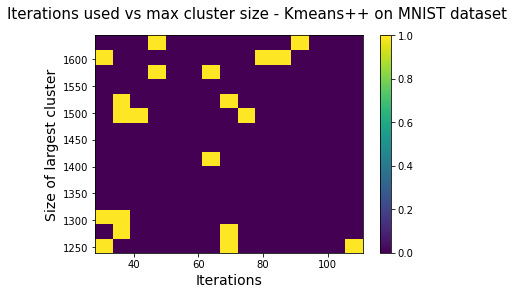

In [16]:
acc = []
loss = []
iters = []
sizes = []
for i in range(20):
    c, a, l = kmeanspp(mnist_data, 10, 1); # centroids, assignments and loss from each iteration
    loss.append(l[-1])
    acc.append(m.get_accuracy(a)[-1])
    iters.append(len(l))
    sizes.append(sum(Counter(a).most_common(1)[0]))
    plt.plot(l)
plt.xlabel('Iterations', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.show()


print("Max loss: %f2 , Min loss: %f2 , Avg loss %f2 , Std: %f2" % (np.max(loss), np.min(loss), np.mean(loss), np.std(loss)))
print("Max accuracy: %f2 , Min accuracy: %f2 , Avg accuracy %f2 , Std: %f2" % (np.max(acc), np.min(acc), np.mean(acc), np.std(acc)))
print("Max largest cluster size: %d , Min largest cluster size: %d , Avg largest cluster size %f2 , Std: %f2" % (np.max(sizes), np.min(sizes), np.mean(sizes), np.std(sizes)))
print("Max number of iterations: %d , Min number of iterations: %d , Avg number of iterations %f2 , Std: %f2" % (np.max(iters), np.min(iters), np.mean(iters), np.std(iters)))
plt.scatter(x=acc, y=loss)
plt.suptitle('Accuracy vs loss - Kmeans++ on MNIST dataset', fontsize=15)
plt.xlabel('Accuracy', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.show()

plt.hist2d(x=iters, y=sizes, bins=15)
plt.suptitle('Iterations used vs max cluster size - Kmeans++ on MNIST dataset', fontsize=15)
plt.xlabel('Iterations', fontsize=14)
plt.ylabel('Size of largest cluster', fontsize=14)
plt.colorbar()
plt.show()

# MNIST and PCA
The data printed here is similar to that in Table 4 of the report. You may want to switch to manhattan distance, as results are very interesting; PCA784 is far better than no PCA at all.

Printed data mirrors Table 4

Max loss: 349639.1394202 , Min loss: 346100.2035242 , Avg loss 347687.4134112 , Std: 1310.7651732
Max accuracy: 0.5946002 , Min accuracy: 0.5329002 , Avg accuracy 0.5585402 , Std: 0.0165472
Max largest cluster size: 1726 , Min largest cluster size: 1275 , Avg largest cluster size 1492.8000002 , Std: 159.4564522
Max number of iterations: 101 , Min number of iterations: 25 , Avg number of iterations 67.5000002 , Std: 25.6017582


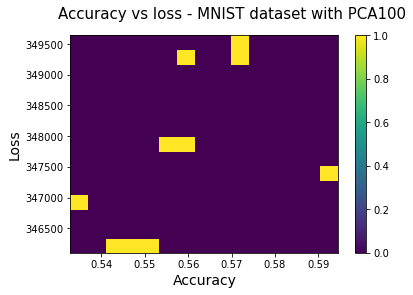

Max loss: 385371.5053992 , Min loss: 382607.2483172 , Avg loss 383916.5831242 , Std: 838.5434922
Max accuracy: 0.6214002 , Min accuracy: 0.5195002 , Avg accuracy 0.5563502 , Std: 0.0293042
Max largest cluster size: 1680 , Min largest cluster size: 1280 , Avg largest cluster size 1537.4000002 , Std: 129.7714912
Max number of iterations: 82 , Min number of iterations: 20 , Avg number of iterations 47.7000002 , Std: 17.4817052


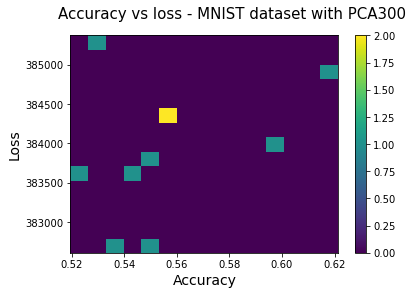

Max loss: 391743.0772472 , Min loss: 389116.3277292 , Avg loss 390293.9431852 , Std: 857.5086742
Max accuracy: 0.6079002 , Min accuracy: 0.5101002 , Avg accuracy 0.5558102 , Std: 0.0339812
Max largest cluster size: 1752 , Min largest cluster size: 1286 , Avg largest cluster size 1540.2000002 , Std: 112.0542732
Max number of iterations: 124 , Min number of iterations: 29 , Avg number of iterations 56.2000002 , Std: 24.2932092


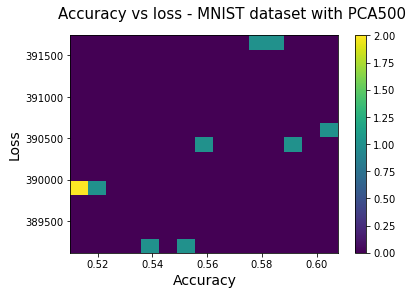

Max loss: 392677.3430012 , Min loss: 389525.3658902 , Avg loss 390838.2005442 , Std: 1019.7614902
Max accuracy: 0.6079002 , Min accuracy: 0.5151002 , Avg accuracy 0.5567102 , Std: 0.0270182
Max largest cluster size: 1704 , Min largest cluster size: 1476 , Avg largest cluster size 1572.3000002 , Std: 87.8191892
Max number of iterations: 87 , Min number of iterations: 30 , Avg number of iterations 45.9000002 , Std: 17.5923282


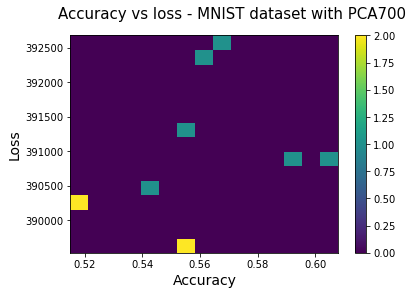

In [18]:
for i in [100, 300, 500, 700]: #add / remove PCA levels here
    pca = PCA(n_components=i)
    d = pca.fit_transform(mnist_data)
    acc = []
    loss = []
    iters = []
    sizes = []
    for j in range(10):
        c, a, l = kmeanspp(d, 10, 1); # centroids, assignments and loss from each iteration
        loss.append(l[-1])
        acc.append(m.get_accuracy(a)[-1])
        iters.append(len(l))
        sizes.append(sum(Counter(a).most_common(1)[0]))
    print("Max loss: %f2 , Min loss: %f2 , Avg loss %f2 , Std: %f2" % (np.max(loss), np.min(loss), np.mean(loss), np.std(loss)))
    print("Max accuracy: %f2 , Min accuracy: %f2 , Avg accuracy %f2 , Std: %f2" % (np.max(acc), np.min(acc), np.mean(acc), np.std(acc)))
    print("Max largest cluster size: %d , Min largest cluster size: %d , Avg largest cluster size %f2 , Std: %f2" % (np.max(sizes), np.min(sizes), np.mean(sizes), np.std(sizes)))
    print("Max number of iterations: %d , Min number of iterations: %d , Avg number of iterations %f2 , Std: %f2" % (np.max(iters), np.min(iters), np.mean(iters), np.std(iters)))
    plt.hist2d(x=acc, y=loss, bins=15)
    plt.suptitle('Accuracy vs loss - MNIST dataset with PCA' + str(i), fontsize=15)
    plt.xlabel('Accuracy', fontsize=14)
    plt.ylabel('Loss', fontsize=14)
    plt.colorbar()
    plt.show()

# Visualizing MNIST centroids like in the podcast

Podcast timestamp: https://www.youtube.com/watch?v=XbRdxrKCLBg&t=1501s

Note the very large run-to-run variance

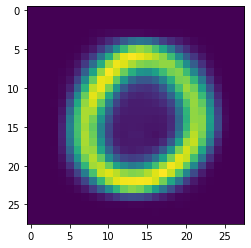

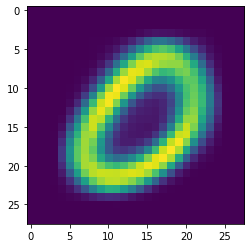

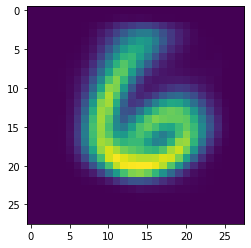

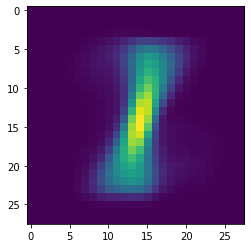

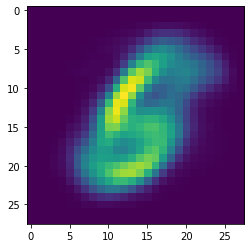

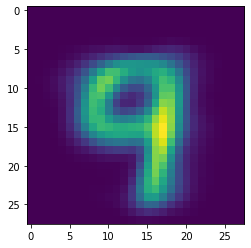

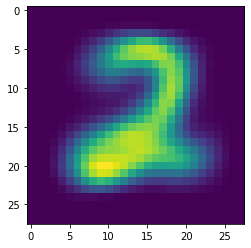

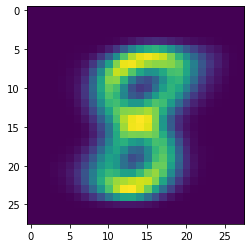

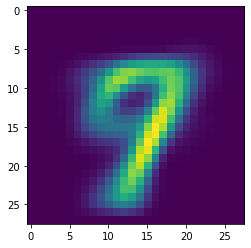

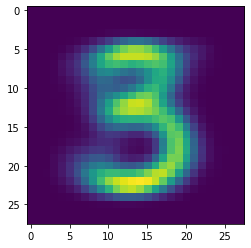

In [15]:
c, a, l = kmeans(mnist_data, 10, 1)
for i in range(10):
    plt.imshow(np.reshape(c[i], (28, 28)))
    plt.show()